# ***Unzipping the data***

In [ ]:
!unzip '/content/Flowers-Dataset.zip'

unzip:  cannot find or open /content/Flowers-Dataset.zip, /content/Flowers-Dataset.zip.zip or /content/Flowers-Dataset.zip.ZIP.


# ***Data Augmentation***

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import necessary lib.


In [ ]:
# Data augmentation on training variable

train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [ ]:
# Data augmentation on testing variable

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Data augmentation on training data

xtrain = train_datagen.flow_from_directory('/content/flowers',
                                           target_size=(64,64),
                                           class_mode='categorical',
                                           batch_size=100)



xtest = test_datagen.flow_from_directory('/content/flowers',
                                         target_size=(64,64),
                                         class_mode='categorical',
                                         batch_size=100)

Found 4317 images belonging to 5 classes.
Found 4317 images belonging to 5 classes.


# ***CNN Model Creation***

In [ ]:
# Importing req. lib.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense

In [ ]:
 # Build a CNN block

model = Sequential() # Initializing sequential model
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3))) # convolution layer
model.add(MaxPooling2D(pool_size=(2, 2))) # Max pooling layer
model.add(Flatten()) # Flatten layer
model.add(Dense(300,activation='relu')) # Hidden layer 1
model.add(Dense(150,activation='relu')) # Hidden layer 2
model.add(Dense(5,activation='softmax')) # Output layer#

# ***Compiling the model***

In [ ]:
# Compiling the model

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# ***Fit The Model***

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
early_stopping = EarlyStopping(monitor='val_accuracy',
                        patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',
                        patience=5,
                        factor=0.5,min_lr=0.00001)

callback = [reduce_lr,early_stopping]

In [ ]:
#Fit The Model

model.fit_generator(xtrain,
                    steps_per_epoch=len(xtrain),
                    epochs=100,
                    callbacks=callback,
                    validation_data=xtest,
                    validation_steps=len(xtest))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/100
44/44 [==============================] - 46s 1s/step - loss: 1.8332 - accuracy: 0.3433 - val_loss: 1.2083 - val_accuracy: 0.4920 - lr: 0.0010
Epoch 2/100
44/44 [==============================] - 44s 1s/step - loss: 1.1639 - accuracy: 0.5140 - val_loss: 1.1734 - val_accuracy: 0.5374 - lr: 0.0010
Epoch 3/100
44/44 [==============================] - 46s 1s/step - loss: 1.0839 - accuracy: 0.5650 - val_loss: 0.9902 - val_accuracy: 0.6220 - lr: 0.0010
Epoch 4/100
44/44 [==============================] - 44s 1s/step - loss: 0.9972 - accuracy: 0.6229 - val_loss: 1.1430 - val_accuracy: 0.5316 - lr: 0.0010
Epoch 5/100
44/44 [==============================] - 44s 1s/step - loss: 0.9589 - accuracy: 0.6331 - val_loss: 1.0079 - val_accuracy: 0.6217 - lr: 0.0010
Epoch 6/100
44/44 [==============================] - 46s 1s/step - loss: 0.8961 - accuracy: 0.6574 - val_loss: 0.8191 - val_accuracy: 0.6917 - lr: 0.0010
Epoch 7/100
44/44 [==============================] - 46s 1s/step - loss: 0.8

# ***Saving the Model***

In [ ]:
model.save('Flowers.h5')


# ***Testing the Model***

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

#Testing
img = image.load_img('/content/flowers/rose/5349865018_99cd7f985a_n.jpg',target_size=(64,64)) # Reading image
x = image.img_to_array(img) # Converting image into array
x = np.expand_dims(x,axis=0) # expanding Dimensions
pred = np.argmax(model.predict(x)) # Predicting the higher probablity index
op = ['daisy','dandelion','rose','sunflower','tulip'] # Creating list
op[pred] # List indexing with output


'rose'

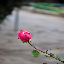

In [ ]:
img

In [ ]:
#Testing 2
img = image.load_img('/content/flowers/dandelion/34351602790_37234e2dae_n.jpg',target_size=(64,64)) # Reading image
x = image.img_to_array(img) # Converting image into array
x = np.expand_dims(x,axis=0) # expanding Dimensions
pred = np.argmax(model.predict(x)) # Predicting the higher probablity index
op = ['daisy','dandelion','rose','sunflower','tulip'] # Creating list
op[pred] # List indexing with output

'sunflower'

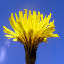

In [ ]:
img

In [ ]:
#Testing 3
img = image.load_img('/content/flowers/tulip/13974542496_e4b5d1c913_n.jpg',target_size=(64,64)) # Reading image
x = image.img_to_array(img) # Converting image into array
x = np.expand_dims(x,axis=0) # expanding Dimensions
pred = np.argmax(model.predict(x)) # Predicting the higher probablity index
op = ['daisy','dandelion','rose','sunflower','tulip'] # Creating list
op[pred] # List indexing with output


'sunflower'

In [ ]:
#Testing Google Image
img = image.load_img('/content/marguerite-5959944__340.webp',target_size=(64,64)) # Reading image
x = image.img_to_array(img) # Converting image into array
x = np.expand_dims(x,axis=0) # expanding Dimensions
pred = np.argmax(model.predict(x)) # Predicting the higher probablity index
op = ['daisy','dandelion','rose','sunflower','tulip'] # Creating list
op[pred] # List indexing with output




'daisy'

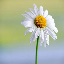

In [ ]:
img